In [1]:
import data
from stable_baselines3 import PPO
from stable_baselines3 import SAC
from stable_baselines3 import DDPG
import random
import numpy as np
from collections import deque
import environments
from environments import QuadraticEnv1D
from IPython.display import clear_output
import torch
import matplotlib.pyplot as plt
import testing

In [2]:
testing_functions = data.generate_dataset(n = 10, function_type = 'quadratic_function_1d')

/opt/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:437: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  th_object = th.load(file_content, map_lo

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/opt/anaconda3/lib/python3.11/site-packages/stable_baselines3/common/save_util.py:437: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  th_object = th.load(file_content, map_lo

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


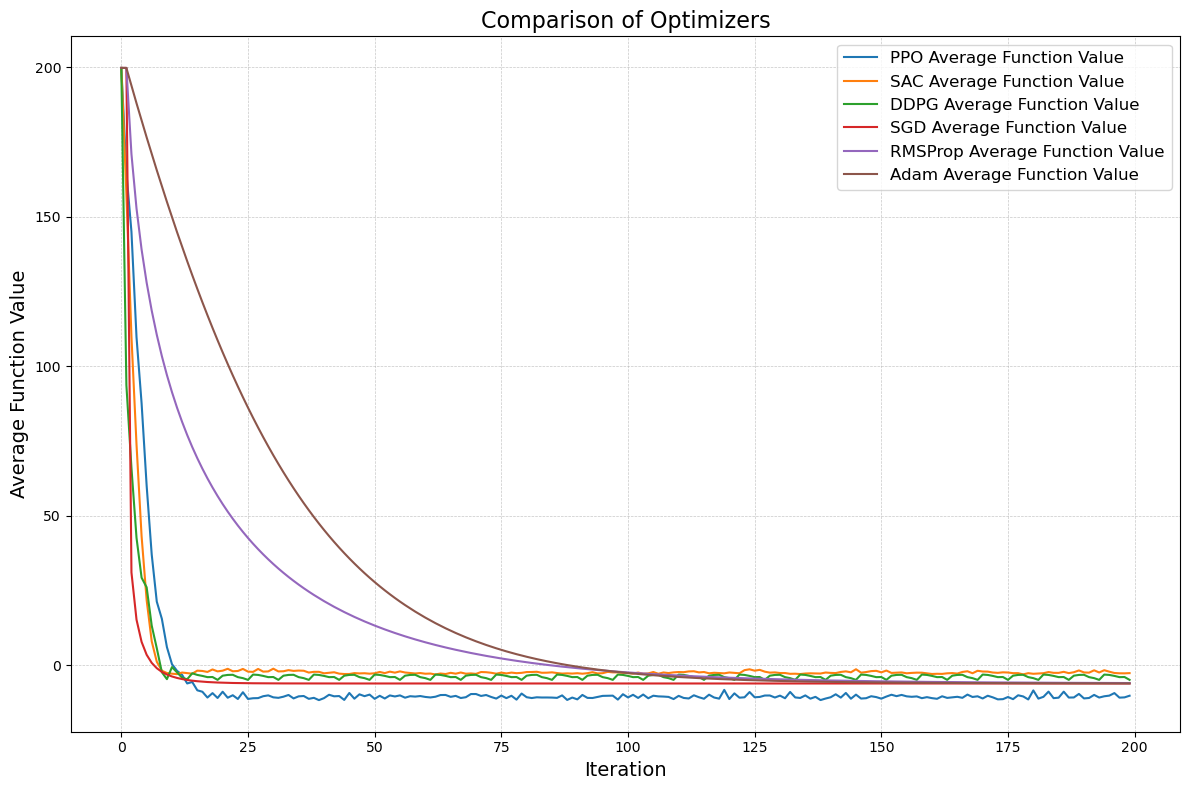

In [ ]:
env = QuadraticEnv1D(functions = testing_functions)
model_sac = SAC.load("Quadratic_1D_SAC", env = env)
model_ppo = PPO.load("Quadratic_1D_PPO", env = env)
model_ddpg = DDPG.load("Quadratic_1D_DDPG", env = env)
models = {
        'PPO': model_ppo,
        'SAC': model_sac,
        'DDPG': model_ddpg,
        'SGD': None,
        'RMSProp': None,
        'Adam': None,
    }
max_iterations = 200
results = testing.run_optimizer_tests(env, testing_functions, models, max_iterations = 200, function_type = 'quadratic_function_1d')
avg_values = testing.calculate_average_values(results)

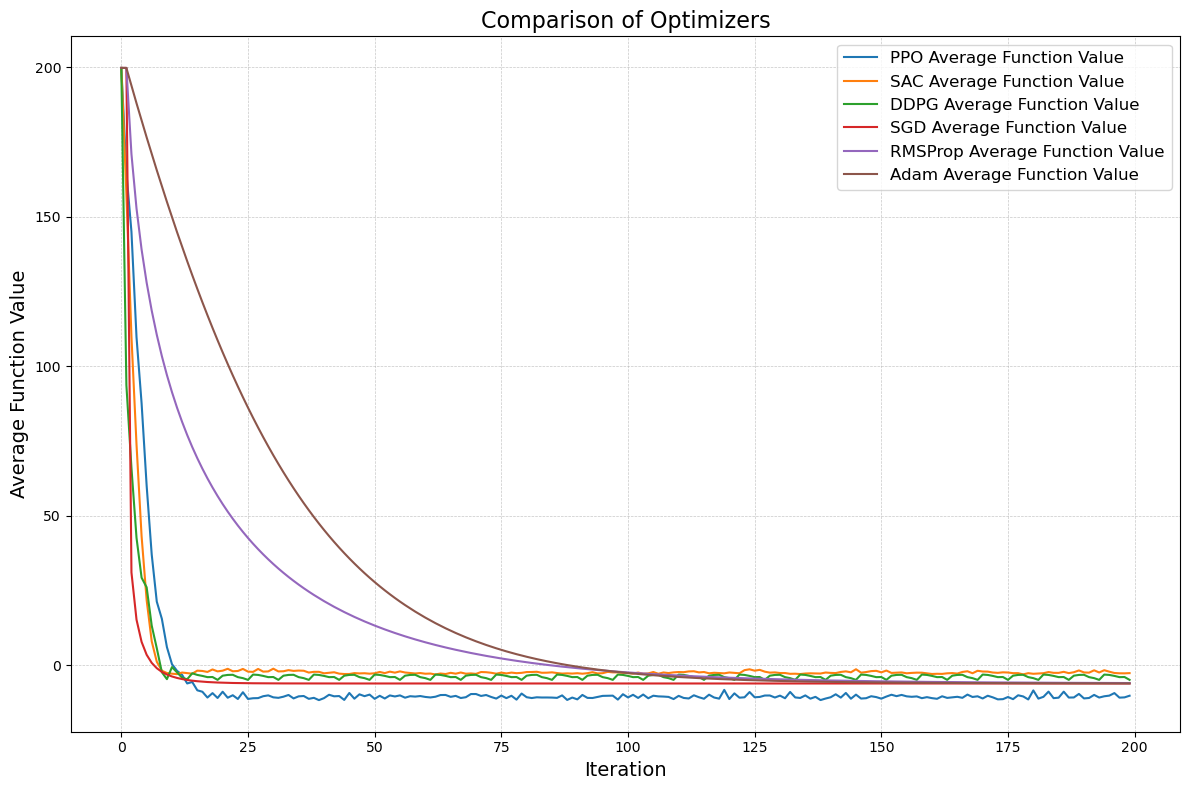

In [19]:
testing.plot_results(avg_values, max_iterations, "Quadratic_Function1D_Accuracy_Comparison")

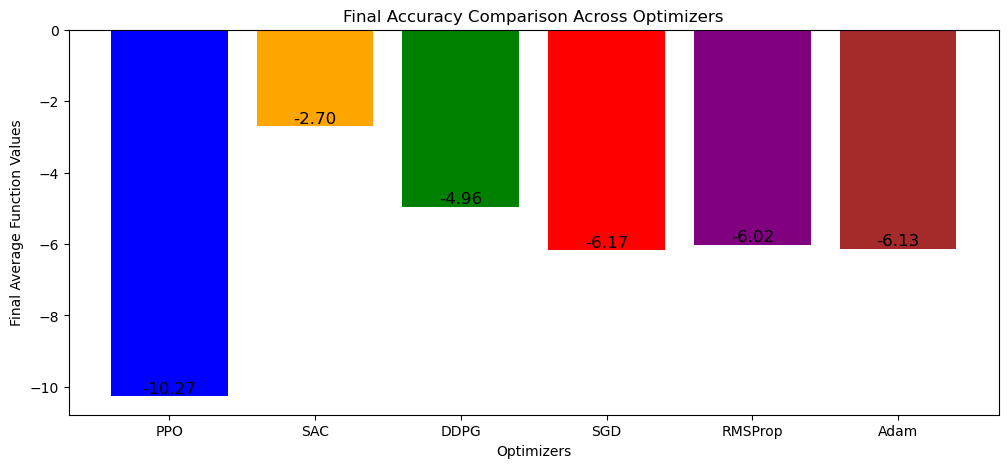

In [21]:
comparison = []
for model_name, data in avg_values.items():
    comparison.append((model_name, data[-1]))

testing.plot_final_function_values(comparison, "Quadratic_Function1D_Final_Accuracy")

In [5]:
'''
env = QuadraticEnv1D(functions = training_functions)
model_ppo = PPO("MlpPolicy", env, verbose=1, learning_rate=1e-3)
callback = environments.JupyterNotebookPlotCallback()
model_ppo.learn(total_timesteps=100000, callback=callback)
'''

'\nenv = QuadraticEnv1D(functions = training_functions)\nmodel_ppo = PPO("MlpPolicy", env, verbose=1, learning_rate=1e-3)\ncallback = environments.JupyterNotebookPlotCallback()\nmodel_ppo.learn(total_timesteps=100000, callback=callback)\n'

In [6]:
'''
env = QuadraticEnv1D(functions = training_functions)
model_sac = SAC("MlpPolicy", env, verbose=1, learning_rate=1e-3)
callback = environments.JupyterNotebookPlotCallback()
model_sac.learn(total_timesteps=100000, callback=callback)
'''

'\nenv = QuadraticEnv1D(functions = training_functions)\nmodel_sac = SAC("MlpPolicy", env, verbose=1, learning_rate=1e-3)\ncallback = environments.JupyterNotebookPlotCallback()\nmodel_sac.learn(total_timesteps=100000, callback=callback)\n'

In [7]:
'''
training_functions = data.generate_dataset(n = 50, function_type = 'quadratic_function_1d')
env = QuadraticEnv1D(functions = training_functions)
model_ddpg = DDPG("MlpPolicy", env, verbose=1, learning_rate=1e-4)
callback = environments.JupyterNotebookPlotCallback()
model_ddpg.learn(total_timesteps=100000, callback=callback)
'''

'\ntraining_functions = data.generate_dataset(n = 50, function_type = \'quadratic_function_1d\')\nenv = QuadraticEnv1D(functions = training_functions)\nmodel_ddpg = DDPG("MlpPolicy", env, verbose=1, learning_rate=1e-4)\ncallback = environments.JupyterNotebookPlotCallback()\nmodel_ddpg.learn(total_timesteps=100000, callback=callback)\n'

In [8]:
'''
model_ppo.save("Quadratic_1D_PPO")
print("PPO Agent saved successfully!")

model_sac.save("Quadratic_1D_SAC")
print("SAC Agent saved successfully!")

model_ddpg.save("Quadratic_1D_DDPG")
print("DDPG Agent saved successfully!")
'''

'\nmodel_ppo.save("Quadratic_1D_PPO")\nprint("PPO Agent saved successfully!")\n\nmodel_sac.save("Quadratic_1D_SAC")\nprint("SAC Agent saved successfully!")\n\nmodel_ddpg.save("Quadratic_1D_DDPG")\nprint("DDPG Agent saved successfully!")\n'